# Приколюха на ст. 89

Действительно ли t-статистика коэффициента множестенной линейной регрессии это квардратный корень из F статистики модели без включения соответсвующего предиктора? (ст 89)

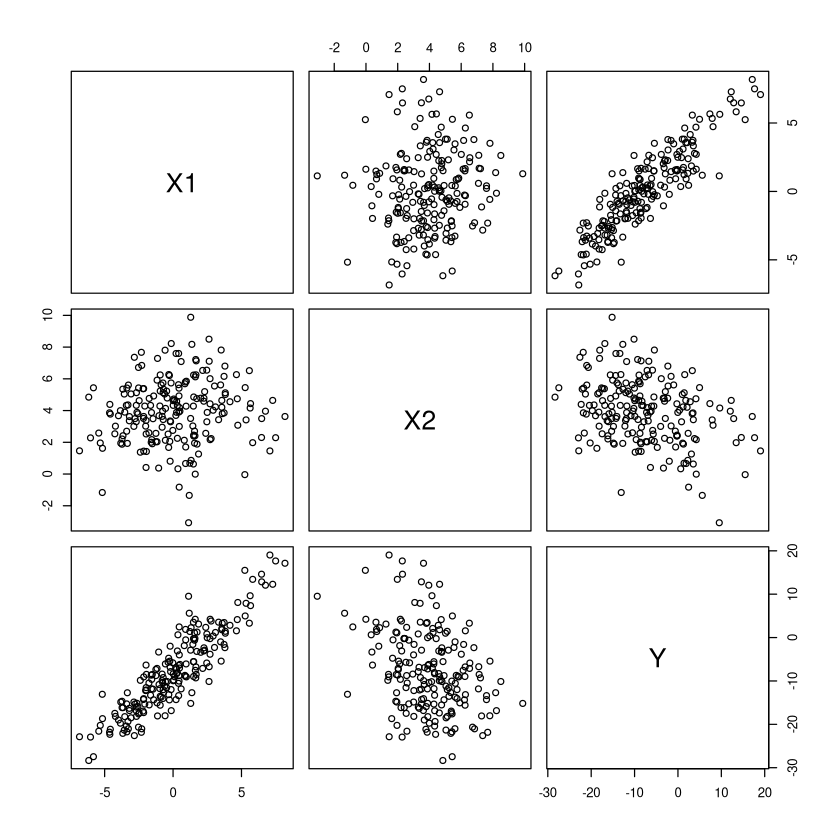

In [1]:
sample_size = 200

test_frame = data.frame(X1 = rnorm(sample_size, 0, 3), X2 = rnorm(sample_size, 4,2))
test_frame$Y = test_frame$X1*3 - test_frame$X2*2 + rnorm(sample_size, 0, 0.5)

pairs(test_frame)

## Базовая модель и ее F-статистика

In [2]:
main_model = lm("Y~X1+X2", test_frame)
summary(main_model)


Call:
lm(formula = "Y~X1+X2", data = test_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48576 -0.30220 -0.00051  0.32042  1.18106 

Coefficients:
            Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.01555    0.07458   -0.208    0.835    
X1           2.99144    0.01147  260.732   <2e-16 ***
X2          -2.00703    0.01682 -119.303   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4778 on 197 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9974 
F-statistic: 3.839e+04 on 2 and 197 DF,  p-value: < 2.2e-16


Здесь F статистика позволяет отвергнуть гипотезу, что

$$ H_0:\beta_1 = \beta_2 = 0 $$

## Ошибочное поверхностное суждение

Можно подумать, что при сключении из модели показателя (например Х1) F полученной модели составит квадрат t X1 в исходной модели.

In [3]:
gip_model = lm("Y~X2", test_frame)
summary(gip_model)


Call:
lm(formula = "Y~X2", data = test_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2229  -6.2761  -0.2326   5.6315  24.3342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5094     1.3799  -1.094    0.275    
X2           -1.5698     0.3106  -5.054 9.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.866 on 198 degrees of freedom
Multiple R-squared:  0.1143,	Adjusted R-squared:  0.1098 
F-statistic: 25.54 on 1 and 198 DF,  p-value: 9.828e-07


Получаем

In [4]:
print("квардат t статистики коэффциента при Х1 исходной модели")
print(summary(main_model)$coefficients[2,3]^2)
print("F статистика новой модели")
print(unname(summary(gip_model)$fstatistic)[1])
# print(summary(main_model)[["F-statistic"]])

[1] "квардат t статистики коэффциента при Х1 исходной модели"
[1] 67981.23
[1] "F статистика новой модели"
[1] 25.5394


## Как должно быть

Обратив внимание что на ячейку выше F статистика призвана для проверки гипотезы

$$H_0: \beta_2 = 0$$

Однако в книжке назвают гипотезу:

$$H_0: \beta_1 = 0$$

И это имеется ввиду без отрыва от многофакторной модели!!!<br>
Приводиться статистика для проверки такой гипотезы:

$$F = \frac{(RSS_0 - RSS)/p}{RSS/(n-p-1)}$$

Где $RSS_0$ - сумма квадратов остатков модели с исключенными показтелями;<br>
$RSS$ - сумма квадратов остатков исходной модели;<br>
$n$ - объем выборки;<br>
$p$ - число переменных включенных в модель.

In [7]:
RSS_0 = sum(gip_model$residuals^2)
RSS = sum(main_model$residuals^2)

true_F = ((RSS_0 - RSS)/1)/(RSS/(sample_size - 3))
true_F

[1] 67981.23

Ещё раз сравню с квадратом $t^2$

In [10]:
print("квардат t статистики коэффциента при Х1 исходной модели")
print(summary(main_model)$coefficients[2,3]^2)
print("F статистика названной гипотезы")
print(true_F)

[1] "квардат t статистики коэффциента при Х1 исходной модели"
[1] 67981.23
[1] "F статистика названной гипотезы"
[1] 67981.23
